## Exercise Change Point Detection

When not the mean but the *correlation* of the measurements change, we need to adjust the algorithm. Now, we are not interested in the Mahalanobis distance from the point to the distribution; we are interested in the time-points where the covariance *increases* (or again *decreases*) and keeps that up for a specific interval (to account for outliers). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## create a different data set

In this case, we basically use the same data as in [the demo-notebook](../demos/demo_changepoint_detection.ipynb); we just keep the agerage the same and change only the covariance.

In [2]:
mu1 = [1, 2, 3]
cov1 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
mu2 = [3, 6, 9]
cov2 = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]
data1 = np.random.multivariate_normal(mu1, cov1, size=(25,))
data2 = np.random.multivariate_normal(mu1, cov2, size=(25,))
data = np.append(data1, data2, axis=0)

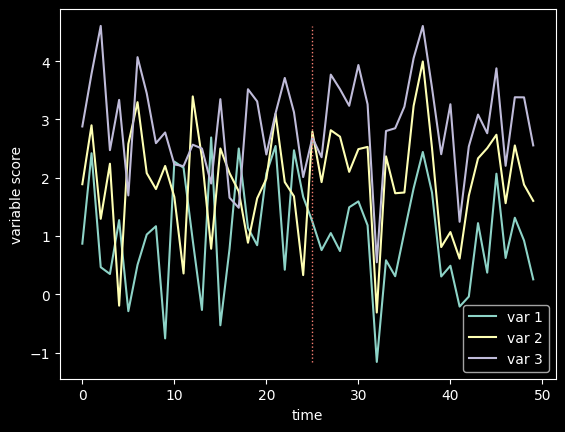

In [3]:
fig = plt.plot(data)
plt.rcParams['figure.figsize'] = (30,10)
plt.plot([25, 25], [np.min(data), np.max(data)], linestyle=':', linewidth=1)
plt.xlabel('time')
plt.ylabel('variable score')
plt.legend(iter(fig), ('var 1','var 2','var 3'))
plt.savefig('multivariate.png')

We can basically use the same algorithm as the one we described in [the demo-notebook](../demos/demo_changepoint_detection.ipynb), only in this case we don't calculate the Mahalanobis-distance, but only the covariance-matrix of the window. We keep track of a sudden change of the values in this matrix, thereby reintroducing the same problem but this time in only one dimension.

To determine the change point using a moving window algorithm with the provided data, you can follow these steps:

- Calculate the covariance matrix for each moving window.
- Track the change in covariance matrices between consecutive windows.
- Set a threshold for the change in covariance matrices to identify the change point.